In [3]:
import pandas as pd
import numpy as np

In [4]:
df_ratings = pd.read_csv("ml-latest-small/ratings.csv")
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_ratings.info

<bound method DataFrame.info of         userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]>

In [6]:
# for each user, randomly select 80% of it's ratings as the training ratings, 
# and use the remaining 20% ratings as validation ratings.

idx = df_ratings.groupby('userId').apply(lambda x: x.sample(frac=0.8, random_state = 0)) \
  .index.get_level_values(1)

training = df_ratings.iloc[idx, :].reset_index(drop = True)
testing = df_ratings.drop(idx).reset_index(drop = True)

In [7]:
training.head()

,userId,movieId,rating,timestamp
0,1,3578,5.0,964980668
1,1,2268,4.0,964982989
2,1,5060,5.0,964984002
3,1,2944,5.0,964981872
4,1,2137,5.0,964982791


In [8]:
training.shape

(80672, 4)

In [9]:
testing.head()

,userId,movieId,rating,timestamp
0,1,157,5.0,964984100
1,1,362,5.0,964982588
2,1,457,5.0,964981909
3,1,543,4.0,964981179
4,1,590,4.0,964982546


In [10]:
testing.shape

(20164, 4)

In [11]:
# save training dataset

training.to_csv('dataset_split/training_set.csv', index=False) 

In [12]:
# save validation dataset

testing.to_csv('dataset_split/testing_set.csv', index=False)

In [14]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 4.2 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/Users/kaashyap/programs/RA Task/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


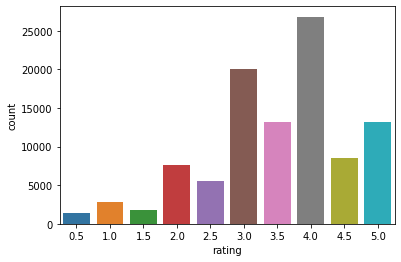

In [15]:
import seaborn as sns

ax = sns.countplot(x="rating",data=df_ratings)


In [16]:
df_movies = pd.read_csv("ml-latest-small/movies.csv")

In [17]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
genres_df = pd.DataFrame(columns=['Genre', 'Count'])

genres_dict = {}
for row in df_movies['genres']:
    genres_list = row.split('|')
    for genre in genres_list:
        if genre in genres_dict:
            genres_dict[genre] += 1
        else:
            genres_dict[genre] = 1


In [19]:
for genre, count in genres_dict.items():
    genres_df = genres_df.append({'Genre': genre, 'Count': count}, ignore_index=True)

    

In [21]:
import matplotlib.pyplot as plt

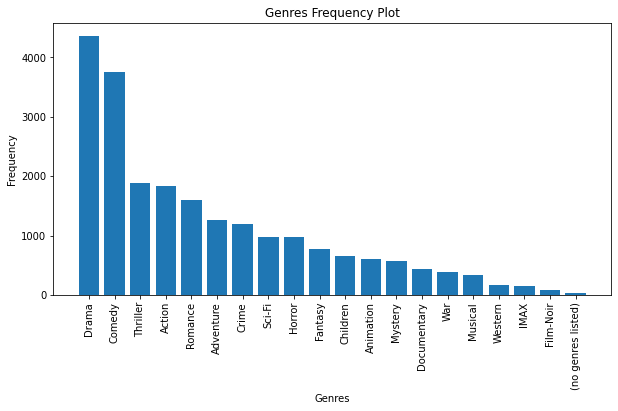

In [22]:
genres_df = genres_df.sort_values('Count', ascending=False)

# Plot the frequency of genres using a bar chart
plt.figure(figsize=(10, 5))
plt.bar(genres_df['Genre'], genres_df['Count'])
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Genres Frequency Plot')
plt.show()


In [23]:
from wordcloud import WordCloud


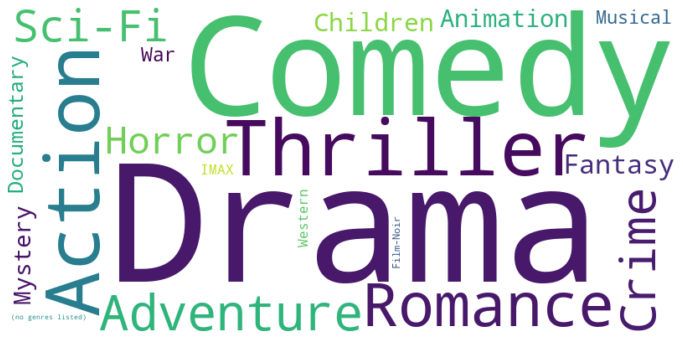

In [24]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genres_dict)

# Display the wordcloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
